In [35]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [37]:
# Load the dataset
df = pd.read_csv(r"newspaper_readers_data.csv")
df.head()
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.rename(columns = {'JournalReader':'Newspaper_Reader'},inplace=True)
data_clean = df.copy()
data_clean.dropna(subset =['Portuguese_Citizenship','Frequent_Traveler','Satisfaction_Level','Occupation','Political_Participation','Social_Person','Area_Residence'],inplace=True)
data_clean.isnull().sum()

ID                         0
ID_ORIGINAL                0
Gender                     0
Portuguese_Citizenship     0
Age                        0
Frequent_Traveler          0
Cellphone_Usage            0
Household_Size             0
Newspaper_Reader           0
Satisfaction_Level         0
Occupation                 0
Political_Participation    0
Social_Person              0
Area_Residence             0
Household_Income           0
dtype: int64

In [38]:
# display some basic statistical details of data
data_clean.describe()

,ID,ID_ORIGINAL,Age,Household_Size,Newspaper_Reader,Satisfaction_Level,Household_Income
count,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000
mean,5004.663341,463451.137507,43.634363,2.840897,0.490979,2.645161,9992.892838
std,2310.855760,2571.938726,16.609803,1.523873,0.499953,1.712199,4195.310180
min,1000.000000,458982.000000,18.000000,1.000000,0.000000,1.000000,7000.000000
25%,3005.500000,461278.750000,31.000000,2.000000,0.000000,1.000000,7000.000000
50%,5003.500000,463438.000000,41.000000,2.500000,0.000000,2.000000,8261.000000
75%,7004.250000,465669.250000,53.000000,4.000000,1.000000,4.000000,12044.000000
max,8999.000000,467974.000000,89.000000,9.000000,1.000000,9.000000,24654.000000


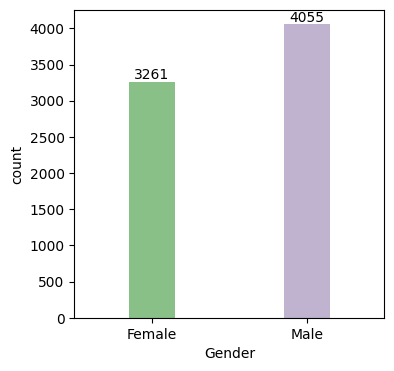

In [39]:
# plotting a bar chart for Gender and it's count
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Gender',width=0.3,data = data_clean,palette="Accent")
for bars in ax.containers:
    ax.bar_label(bars)

Above graph shows total count of males and females

In [40]:
max_age = data_clean['Age'].max()
print(max_age)

89


In [41]:
data_clean.loc[data_clean['Age']<=19, 'Age_group'] = '0-19'
data_clean.loc[data_clean['Age'].between(20,40), 'Age_group'] = '20-40'
data_clean.loc[data_clean['Age'].between(41,60), 'Age_group'] = '41-60'
data_clean.loc[data_clean['Age'].between(61,80), 'Age_group'] = '61-80'
data_clean.loc[data_clean['Age']>81, 'Age_group'] = '81-100'

In [42]:
data_newspaper_readers = data_clean.query('Newspaper_Reader== 1')    
data_newspaper_readers.head(5)

,ID,ID_ORIGINAL,Gender,Portuguese_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Newspaper_Reader,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Household_Income,Age_group
0,1000,467329,Female,No,40,Yes,Low,1.0,1,4.0,Government,Strong involvement,No,City,7000,20-40
4,1004,465709,Male,Yes,68,Yes,Average,2.0,1,4.0,Private company,No involvement,No,City,8261,61-80
5,1005,466716,Female,Yes,79,Yes,Low,1.0,1,8.0,Self-employed,Strong involvement,No,City,8261,61-80
9,1009,465043,Male,Yes,48,Yes,Average,5.0,1,1.0,Government,Strong involvement,No,City,18349,41-60
16,1016,464921,Male,Yes,35,No,Average,5.0,1,1.0,Government,Strong involvement,Yes,Country-side,7000,20-40


In [44]:
data_not_newspaper_readers = data_clean.query('Newspaper_Reader == 0')    
data_not_newspaper_readers.Frequent_Traveler.value_counts()

Frequent_Traveler
No     1898
Yes    1826
Name: count, dtype: int64

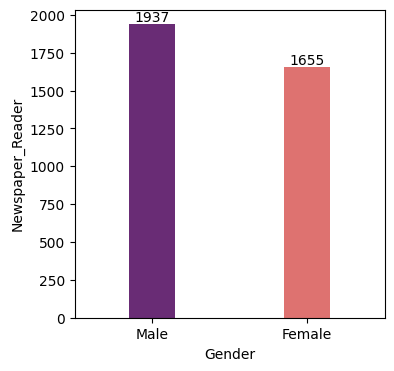

In [46]:
# plotting a bar chart for gender vs Newspaper reader
number_readers_gender = data_newspaper_readers.groupby(['Gender'], as_index=False)['Newspaper_Reader'].sum().sort_values(by='Newspaper_Reader', ascending=False)
plt.figure(figsize = (4,4))
ax =sns.barplot(x = 'Gender',y= 'Newspaper_Reader' ,width = 0.3 ,data = number_readers_gender,palette="magma")
for bars in ax.containers:
    ax.bar_label(bars)

From above graphs we can see that  NewsPaper readers are more males than females. 


In [47]:
journalreaderscount = data_newspaper_readers.Portuguese_Citizenship.value_counts()
journalreaderscount

Portuguese_Citizenship
Yes    2768
No      824
Name: count, dtype: int64

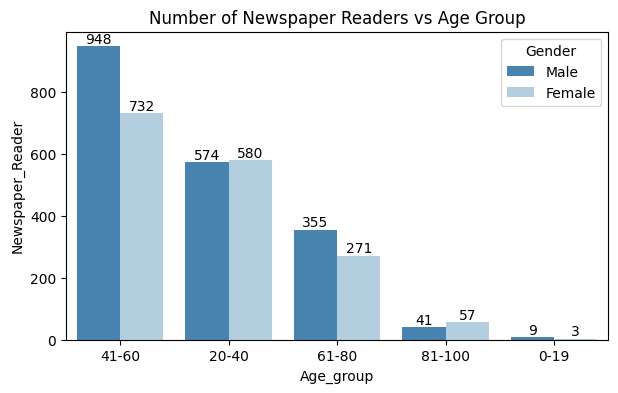

In [48]:
# Number of Newspaper Readers vs Age Group
number_readers_Agegroup  = data_newspaper_readers.groupby(['Age_group','Gender'], as_index=False)['Newspaper_Reader'].sum().sort_values(by='Newspaper_Reader', ascending=False)
plt.figure(figsize = (7,4))
ax1=sns.barplot(data = number_readers_Agegroup,x = 'Age_group',y= 'Newspaper_Reader',hue='Gender',palette="Blues_r")
plt.title('Number of Newspaper Readers vs Age Group')
for bars in ax1.containers:
    ax1.bar_label(bars)

From above graphs we can see that most of the newspaper readers are of age group between 41-60 yrs males and females.

In [49]:
number_readers_byArea  = data_newspaper_readers.groupby(['Area_Residence'], as_index=False)['Newspaper_Reader'].sum().sort_values(by='Newspaper_Reader', ascending=False)
number_readers_byArea

,Area_Residence,Newspaper_Reader
0,City,3279
1,Country-side,313


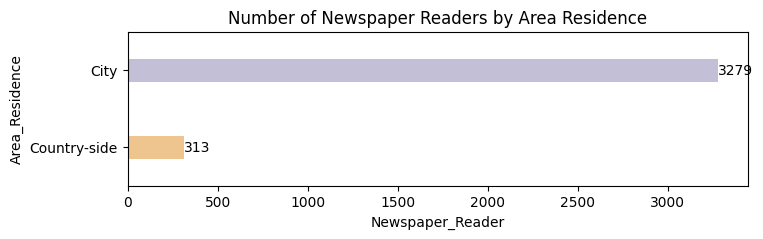

In [57]:
# Number of NewsPaper Readers vs Area Residence
number_readers_byArea  = data_newspaper_readers.groupby(['Area_Residence'], as_index=False)['Newspaper_Reader'].sum().sort_values(by='Newspaper_Reader', ascending=False)
plt.figure(figsize = (8,2))
plt.title('Number of Newspaper Readers by Area Residence')
ax1=sns.barplot(data = number_readers_byArea,y = 'Area_Residence',x= 'Newspaper_Reader',width =0.3,palette="PuOr_r")
for bars in ax1.containers:
    ax1.bar_label(bars)

In [ ]:
#  From above graphs we can see that more  newspaper readers are from city compare to country-side

In [58]:
Total_journal_readers = data_newspaper_readers.groupby(['Frequent_Traveler','Portuguese_Citizenship'],as_index=False)['Newspaper_Reader'].sum().sort_values(by='Newspaper_Reader', ascending=False)
Total_journal_readers

,Frequent_Traveler,Portuguese_Citizenship,Newspaper_Reader
3,Yes,Yes,2235
2,Yes,No,559
1,No,Yes,533
0,No,No,265


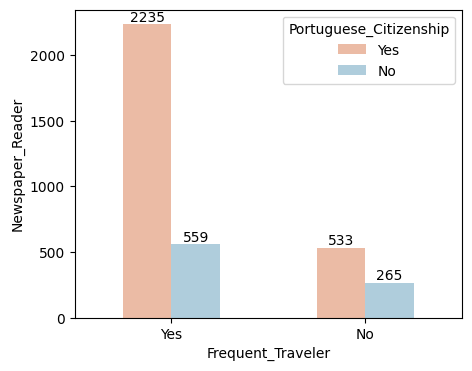

In [59]:
plt.figure(figsize = (5,4))
ax1=sns.barplot(data = Total_journal_readers,x = 'Frequent_Traveler',y= 'Newspaper_Reader',width=0.5,hue='Portuguese_Citizenship',palette="RdBu")
for bars in ax1.containers:
    ax1.bar_label(bars)

In [ ]:
# above graph shows that those are portugues citizenship and frequent travelers are more newspaper readers

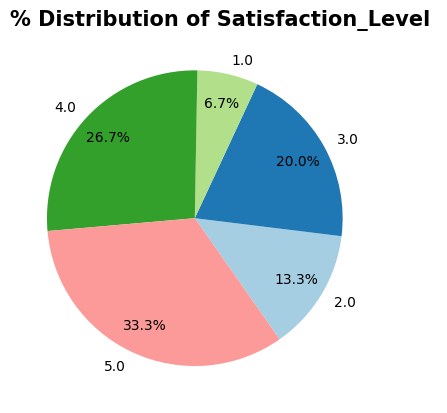

In [60]:
df1 = data_newspaper_readers.groupby(['Satisfaction_Level'], as_index=False)['Newspaper_Reader'].sum().sort_values(by='Newspaper_Reader', ascending=False).head(5)
plt.pie(df1['Satisfaction_Level'],labels = df1['Satisfaction_Level'],
        autopct = '%1.1f%%',pctdistance = 0.8,startangle = 305,
        colors = plt.cm.Paired.colors,textprops = {'fontsize':10})
plt.title('% Distribution of Satisfaction_Level ',fontsize = 15,weight = 'bold',loc = 'left')
plt.show()

In [63]:
number_readers_byoccupation  = data_newspaper_readers.groupby(['Occupation','Political_Participation'], as_index=False)['Newspaper_Reader'].sum().sort_values(by='Newspaper_Reader', ascending=False)
number_readers_byoccupation

,Occupation,Political_Participation,Newspaper_Reader
5,Private company,Unknown,1737
2,Private company,No involvement,347
6,Public company,Strong involvement,347
7,Self-employed,Strong involvement,281
0,Government,Strong involvement,271
4,Private company,Strong involvement,248
3,Private company,Some involvement,226
1,Nothing,Strong involvement,73
8,Student,Strong involvement,62


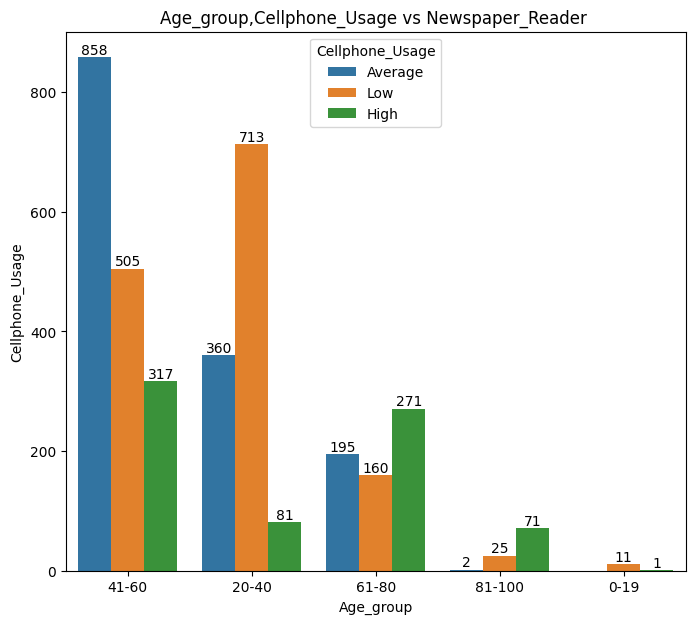

In [65]:
df1 = data_newspaper_readers.groupby(['Cellphone_Usage','Age_group'], as_index=False)['Newspaper_Reader'].sum().sort_values(by='Newspaper_Reader', ascending=False)
plt.figure(figsize=(8,7))
ax2=sns.barplot(data = df1,x = 'Age_group',y= 'Newspaper_Reader',hue='Cellphone_Usage')
for bars in ax2.containers:
    ax2.bar_label(bars)
plt.xlabel('Age_group')
plt.ylabel('Cellphone_Usage')
plt.title('Age_group,Cellphone_Usage vs Newspaper_Reader ')
plt.show()

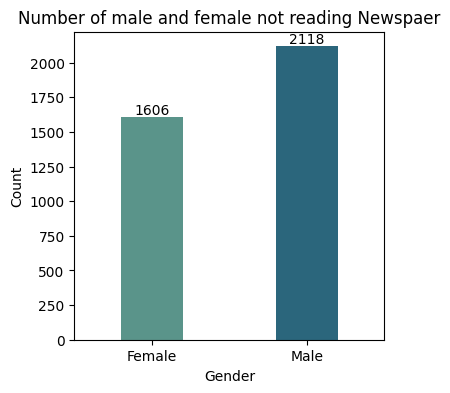

In [66]:
plt.figure(figsize = (4,4))
ax =sns.countplot(x = 'Gender',width = 0.4 ,data = data_not_newspaper_readers,palette="crest")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of male and female not reading Newspaer')
plt.show()    
    
    

In [68]:
le = LabelEncoder()
le1 = LabelEncoder()
ge1 = LabelEncoder()
data_clean['Portuguese_Citizenship'] = le.fit_transform(data_clean['Portuguese_Citizenship'])
data_clean['Frequent_Traveler'] = le1.fit_transform(data_clean['Frequent_Traveler'])
data_clean['Cellphone_Usage'] = ge1.fit_transform(data_clean['Cellphone_Usage'])

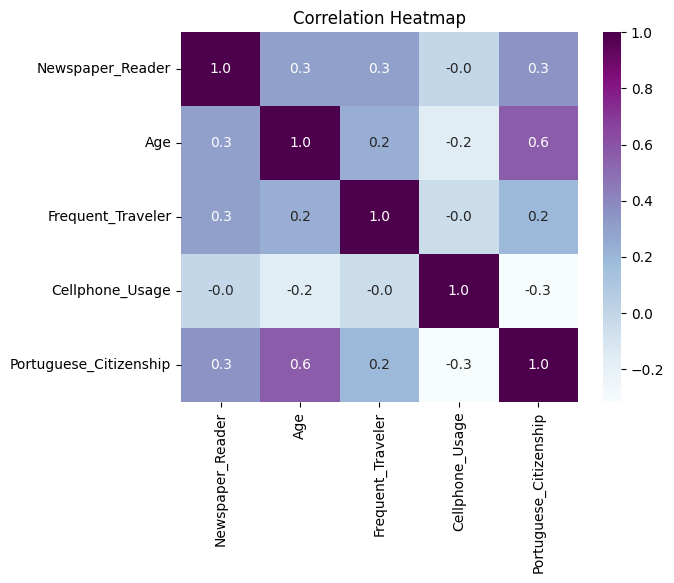

In [71]:
Correlation_matrix = data_clean[['Newspaper_Reader','Age','Frequent_Traveler','Cellphone_Usage','Portuguese_Citizenship']].corr()
sns.heatmap(Correlation_matrix,annot = True,cmap = 'BuPu',fmt = '.1f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# from correlation matrix we are able to see correlation between data fields

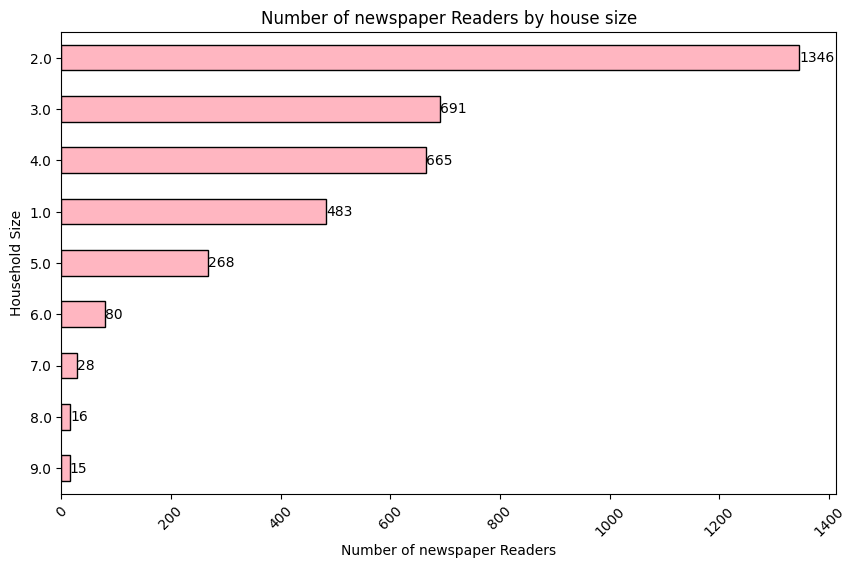

In [89]:
count_new=data_newspaper_readers.Household_Size.value_counts()
count_new.sort_values(ascending = True,inplace = True)
plt.figure(figsize=(10, 6))
ax = count_new.plot(kind='barh', color='lightpink', edgecolor='black')
plt.ylabel('Household Size')
plt.xlabel('Number of newspaper Readers')
plt.title('Number of newspaper Readers by house size')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.show()